Parâmetros da melhor solução : [353278.43 0.043771]
Valor da avaliação da melhor solução : -355708.2286267128


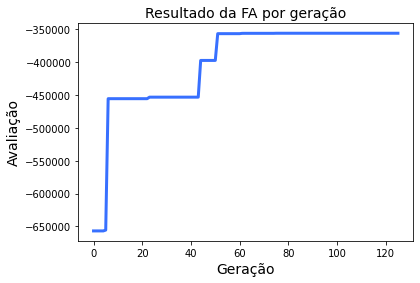

Melhor avaliação atingida após 75 gerações.
Tempo de execução: 0.292022705078125 s


In [19]:
import pygad
import numpy as np
import math
import time
from matplotlib import pyplot as plt

"""
Problema de otimizacao nao linear:
    Min W = 500*x1 + 2*10^6*x2 + 5*10^14/(x1^2*x2)
    s.a. (x1,x2) >= 0
"""

function_inputs = [0.5,2*10**6,5*10**14] # Function inputs.

def fitness_func(solution, solution_idx):
    output = solution[0]*function_inputs[0] + solution[1]*function_inputs[1] + function_inputs[2]/((solution[0]**2)*solution[1] + 0.000001)
    fitness = -output # or = 1.0/(output + 0.000001)
    return fitness

# AG parameters
num_genes = len(function_inputs) - 1 # No of genes (decision variables)
sol_per_pop = 50 # Number of solutions in the population, MATLAB default is 50
init_range_low = 0 # Initial population gene value lower bound, MATLAB default is -10
#init_range_high = 10 # Initial population gene value upper bound, MATLAB default is 10
parent_selection_type="tournament" # Roulette, tournament, stochastic, etc.
keep_elitism = math.floor(0.05*sol_per_pop) # No of parents to remain in next generation, MATLAB default is 0.05*PopSize
mutation_type="adaptive" # Choose random or adaptive
mutation_probability=[0.35, 0.05] # [high, low] if adaptive
crossover_type="single_point" # Choose single or two points
#crossover_probability=0.8 # MATLAB default is 0.8 (?)
num_parents_mating = math.floor(0.7*sol_per_pop) # Number of solutions to be selected as parents in the mating pool, # MATLAB default is 0.8 (?)
gene_type=[[float, 2], [float, 6]] # Data type and (float) precision
gene_space=[{'low': 10**4, 'high': 10**6}, {'low': 0, 'high': 10}] # Lower and upper bounds
num_generations = 100*num_genes # Number of generations, MATLAB default is 100*(no of variables)

stop_criteria="saturate_50" # Stop after n generations of fitness saturation, MATLAB default is 50
parallel_processing=None # ["process", sol_per_pop] or ["thread", sol_per_pop]
random_seed=None # For reproducible results

# Callback function
last_fitness = 0
def on_generation(ga_instance):
    global last_fitness
    print("Geração          = {generation}".format(generation=ga_instance.generations_completed))
    print("Melhor Avaliação = {fitness}".format(fitness=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]))
    print("Melhor Solução = {solution}".format(solution=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[0]))
    print("Mudança          = {change}".format(change=ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1] - last_fitness))
    last_fitness = ga_instance.best_solution(pop_fitness=ga_instance.last_generation_fitness)[1]

def on_stop(ga_instance, last_population_fitness):
    # Returning the details of the best solution.
    solution, solution_fitness, solution_idx = ga_instance.best_solution(ga_instance.last_generation_fitness)
    print("Parâmetros da melhor solução : {solution}".format(solution=solution))
    print("Valor da avaliação da melhor solução : {solution_fitness}".format(solution_fitness=solution_fitness))
    #print("Índice da melhor solução : {solution_idx}".format(solution_idx=solution_idx))

# Instantiate GA class
ga_instance = pygad.GA(fitness_func=fitness_func,
                       num_genes=num_genes,
                       sol_per_pop=sol_per_pop,
                       init_range_low=init_range_low,
                       parent_selection_type=parent_selection_type,
                       keep_elitism=keep_elitism,
                       mutation_type=mutation_type,
                       mutation_probability=mutation_probability,
                       crossover_type=crossover_type,
                       num_parents_mating=num_parents_mating,
                       gene_type=gene_type,
                       gene_space=gene_space,
                       num_generations=num_generations,
                       stop_criteria=stop_criteria,
                       parallel_processing=parallel_processing,
                       on_stop=on_stop,
                       random_seed=random_seed)

# Running the GA to optimize the parameters of the function.
if __name__ == '__main__':
    t1 = time.time()

    ga_instance.run()

    t2 = time.time()

fig = ga_instance.plot_fitness(title="Resultado da FA por geração", xlabel="Geração", ylabel="Avaliação", linewidth=3, plot_type="plot")
fig.savefig("C:/Users/joaog/Downloads/Graf.pdf", format="pdf", bbox_inches="tight")

#prediction = np.sum(solution*function_inputs[:2]) + function_inputs[2]/((solution[0]**2)*solution[1])
#print("Predicted output based on the best solution : {prediction}".format(prediction=prediction))

if ga_instance.best_solution_generation != -1:
    print("Melhor avaliação atingida após {best_solution_generation} gerações.".format(best_solution_generation=ga_instance.best_solution_generation))
print("Tempo de execução: {time} s".format(time=(t2-t1)))
    
# Saving the GA instance.
#filename = 'NLPRao' # The filename to which the instance is saved. The name is without extension.
#ga_instance.save(filename=filename)

# Loading the saved GA instance.
#loaded_ga_instance = pygad.load(filename=filename)
#loaded_ga_instance.plot_fitness()